# Ridge Regression

*Linear Regression using least square loss with $L_2$ regularization penalty*

---
* [Theory and Derivation](../theory/ridge_regression.ipynb)
* [Implementation in Python](../pymlalgo/regression/ridge_regression.py)

---

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Tell python to look for modules in the current project directory

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

The demo uses the [Diamonds dataset](https://www.kaggle.com/shivam2503/diamonds/).

Price will be used as the response variable other columns would be used as predictors

In [4]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Convert categorical values to category codes**

In [5]:
diamonds['cut'] = diamonds['cut'].astype('category').cat.codes
diamonds['color'] = diamonds['color'].astype('category').cat.codes
diamonds['clarity'] = diamonds['clarity'].astype('category').cat.codes

**Split into predictors and response**

In [6]:
predictors = diamonds.drop(columns='price')
response = diamonds['price']

# Recall that the algorithm needs predictors in shape, (d, n)
x = np.asarray(predictors.transpose())
y = np.asarray(response).reshape(-1, 1)

**Train, test split**

In [7]:
from pymlalgo.util.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9, 44135), (9, 10788), (44135, 1), (10788, 1))

**Normalize the Data**

In [8]:
from pymlalgo.util.normalization import Normalizer

x_normalizer = Normalizer(x_train, type_='f')
x_train = x_normalizer.normalize(x_train)
x_test = x_normalizer.normalize(x_test)

y_normalizer = Normalizer(y_train, type_='l')
y_train = y_normalizer.normalize(y_train)
y_test = y_normalizer.normalize(y_test)

**Train and test using `RigdeRegression`**

In [9]:
from pymlalgo.regression.ridge_regression import RidgeRegression

lambd=1e-4

ridge_model = RidgeRegression(x_train, y_train, lambd=lambd)
ridge_model.train()

**Cost history vs number of iterations**

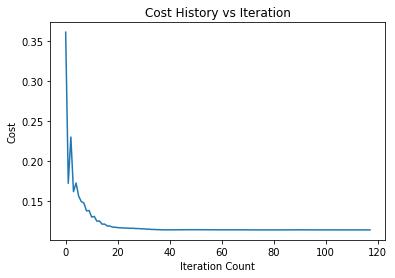

In [10]:
plt.plot(ridge_model.cost_history[2:])
plt.xlabel('Iteration Count')
plt.ylabel('Cost')
plt.title('Cost History vs Iteration');

In [11]:
pd.DataFrame({'train_score' : [ridge_model.r_squared(x_train, y_train)], 
              'test_score': [ridge_model.r_squared(x_test, y_test)]})

,train_score,test_score
0,0.885865,0.881189


**Comparison with `sklearn`**  

The cost function in `sklearn` is $$ F(\beta) = ||Y - X^T\beta||_2^2 + \alpha ||\beta||_2^2$$
To make it equivalent to the cost function in current implementation, $$\lambda = \frac{\alpha}{n} \implies \alpha = n\lambda$$

In [12]:
from sklearn.linear_model import Ridge

alpha = x_train.shape[1] * lambd
ridge_sk = Ridge(alpha = alpha)
ridge_sk = ridge_sk.fit(x_train.T, y_train)

pd.DataFrame({'coef': ridge_model.beta.flatten(), 'sk_coef' : ridge_sk.coef_.flatten()})

,coef,sk_coef
0,1.316454,1.311402
1,0.019263,0.019275
2,-0.115106,-0.115139
3,0.124983,0.125246
4,-0.054979,-0.055240
5,-0.052626,-0.052739
6,-0.338290,-0.329791
7,0.014789,0.007777
8,-0.008558,-0.004966


In [13]:
pd.DataFrame({'train_score' : [ridge_model.r_squared(x_train, y_train)], 
              'train_score_sk' : [ridge_sk.score(x_train.T, y_train)],
              'test_score': [ridge_model.r_squared(x_test, y_test)],
              'test_score_sk' : [ridge_sk.score(x_test.T, y_test)]})

,train_score,train_score_sk,test_score,test_score_sk
0,0.885865,0.885868,0.881189,0.881192
